In [1]:
from preprocess import Preprocess_with_bert
from run import Detect_hate_comments
import warnings
warnings.filterwarnings('ignore')

In [2]:
target = ['hate', 'contain_gender_bias']
model_name = ['bert-base-multilingual-cased', 'kykim/bert-kor-base']
dir_path = ['bert-ckpt', 'kor-bert-ckpt']

# 악성 댓글 탐지 with Bert-base-multilingual

In [10]:
detect = Detect_hate_comments(target=target[0], 
                              model_name=model_name[0], 
                              dir_path=dir_path[0])
detect.train_model(epochs=10, batch_size=128)

100%|███████████████████████████████████████| 974/974 [00:00<00:00, 6429.55it/s]
Some layers from the model checkpoint at bert-base-multilingual-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/10


2022-04-08 19:14:59.447716: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


62/62 [==============================] - ETA: 0s - loss: 0.6771 - accuracy: 0.5774

2022-04-08 19:16:07.601602: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_accuracy improved from -inf to 0.69214, saving model to hate/bert-base-multilingual-cased/cp.ckpt
62/62 [==============================] - 84s 1s/step - loss: 0.6771 - accuracy: 0.5774 - val_loss: 0.5791 - val_accuracy: 0.6921
Epoch 2/10
62/62 [==============================] - ETA: 0s - loss: 0.6039 - accuracy: 0.6733
Epoch 2: val_accuracy improved from 0.69214 to 0.70701, saving model to hate/bert-base-multilingual-cased/cp.ckpt
62/62 [==============================] - 61s 967ms/step - loss: 0.6039 - accuracy: 0.6733 - val_loss: 0.5713 - val_accuracy: 0.7070
Epoch 3/10
62/62 [==============================] - ETA: 0s - loss: 0.5299 - accuracy: 0.7399
Epoch 3: val_accuracy did not improve from 0.70701
62/62 [==============================] - 56s 881ms/step - loss: 0.5299 - accuracy: 0.7399 - val_loss: 0.6490 - val_accuracy: 0.6306
Epoch 4/10
62/62 [==============================] - ETA: 0s - loss: 0.4538 - accuracy: 0.7941
Epoch 4: val_accuracy improved from 0.70701 to 0

In [11]:
acc, f1, cls_report = detect.evaluation(batch_size=128)
print(acc, f1)
print(cls_report)

2022-04-08 19:24:58.039842: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


0.7303609341825902 0.7954911433172303
              precision    recall  f1-score   support

           0       0.60      0.61      0.60       160
           1       0.80      0.79      0.80       311

    accuracy                           0.73       471
   macro avg       0.70      0.70      0.70       471
weighted avg       0.73      0.73      0.73       471



In [12]:
detect.test_model(batch_size=128)

,comments,hate_prediction
0,ㅋㅋㅋㅋ 그래도 조아해주는 팬들 많아서 좋겠다 ㅠㅠ 니들은 온유가 안만져줌 ㅠㅠ,1
1,둘다 넘 좋다~행복하세요,0
2,근데 만원이하는 현금결제만 하라고 써놓은집 우리나라에 엄청 많은데,1
3,원곡생각하나도 안나고 러블리즈 신곡나온줄!!! 너무 예쁘게 잘봤어요,0
4,장현승 얘도 참 이젠 짠하다...,0
...,...,...
969,대박 게스트... 꼭 봐야징~ 컨셉이 바뀌니깐 재미지넹,0
970,성형으로 다 뜯어고쳐놓고 예쁜척. 성형 전 니 얼굴 다 알고있다. 순자처럼 된장냄새...,1
971,분위기는 비슷하다만 전혀다른 전개던데 무슨ㅋㅋㄱ 우리나라사람들은 분위기만 비슷하면 ...,0
972,입에 손가릭이 10개 있으니 징그럽다,1


In [31]:
sentence = "푸틴한테는 한마디도 못하는 역겨운 거지나라 합정공주년"
print(detect.predict(sentence))

[1]


In [32]:
sentence_ = "강아지와 개새끼의 차이가 뭔가요"
print(detect.predict(sentence_))

[0]


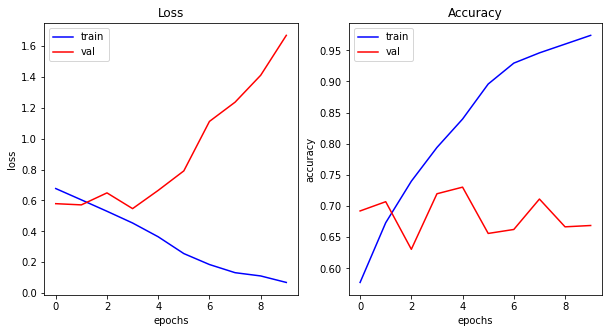

In [13]:
detect.plot_history()

# 악성 댓글 탐지 with kyKim/Bert-kor

In [14]:
detect_ = Detect_hate_comments(target=target[0], 
                               model_name=model_name[1], 
                               dir_path=dir_path[1])
detect_.train_model(epochs=10, batch_size=128)

100%|███████████████████████████████████████| 974/974 [00:00<00:00, 6693.05it/s]
All model checkpoint layers were used when initializing TFBertModel.

All the layers of TFBertModel were initialized from the model checkpoint at kykim/bert-kor-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/10


2022-04-08 19:26:07.636403: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


62/62 [==============================] - ETA: 0s - loss: 0.6670 - accuracy: 0.6212

2022-04-08 19:27:19.950277: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_accuracy improved from -inf to 0.76645, saving model to hate/kykim/bert-kor-base/cp.ckpt
62/62 [==============================] - 88s 1s/step - loss: 0.6670 - accuracy: 0.6212 - val_loss: 0.5015 - val_accuracy: 0.7665
Epoch 2/10
62/62 [==============================] - ETA: 0s - loss: 0.5127 - accuracy: 0.7440
Epoch 2: val_accuracy improved from 0.76645 to 0.78344, saving model to hate/kykim/bert-kor-base/cp.ckpt
62/62 [==============================] - 58s 931ms/step - loss: 0.5127 - accuracy: 0.7440 - val_loss: 0.4640 - val_accuracy: 0.7834
Epoch 3/10
62/62 [==============================] - ETA: 0s - loss: 0.4332 - accuracy: 0.7956
Epoch 3: val_accuracy did not improve from 0.78344
62/62 [==============================] - 54s 873ms/step - loss: 0.4332 - accuracy: 0.7956 - val_loss: 0.6144 - val_accuracy: 0.6985
Epoch 4/10
62/62 [==============================] - ETA: 0s - loss: 0.3407 - accuracy: 0.8470
Epoch 4: val_accuracy did not improve from 0.78344
62/62 [========

In [15]:
acc, f1, cls_report = detect_.evaluation(batch_size=128)
print(acc, f1)
print(cls_report)

2022-04-08 19:35:41.170234: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


0.7834394904458599 0.8210526315789475
              precision    recall  f1-score   support

           0       0.64      0.84      0.73       160
           1       0.90      0.75      0.82       311

    accuracy                           0.78       471
   macro avg       0.77      0.80      0.77       471
weighted avg       0.81      0.78      0.79       471



In [16]:
detect_.test_model(batch_size=128)

,comments,hate_prediction
0,ㅋㅋㅋㅋ 그래도 조아해주는 팬들 많아서 좋겠다 ㅠㅠ 니들은 온유가 안만져줌 ㅠㅠ,0
1,둘다 넘 좋다~행복하세요,0
2,근데 만원이하는 현금결제만 하라고 써놓은집 우리나라에 엄청 많은데,0
3,원곡생각하나도 안나고 러블리즈 신곡나온줄!!! 너무 예쁘게 잘봤어요,0
4,장현승 얘도 참 이젠 짠하다...,0
...,...,...
969,대박 게스트... 꼭 봐야징~ 컨셉이 바뀌니깐 재미지넹,0
970,성형으로 다 뜯어고쳐놓고 예쁜척. 성형 전 니 얼굴 다 알고있다. 순자처럼 된장냄새...,1
971,분위기는 비슷하다만 전혀다른 전개던데 무슨ㅋㅋㄱ 우리나라사람들은 분위기만 비슷하면 ...,1
972,입에 손가릭이 10개 있으니 징그럽다,1


In [25]:
print(detect_.predict(sentence))

[1]


In [33]:
sentence_ = "강아지와 개새끼의 차이가 뭔가요"
print(detect_.predict(sentence_))

[1]


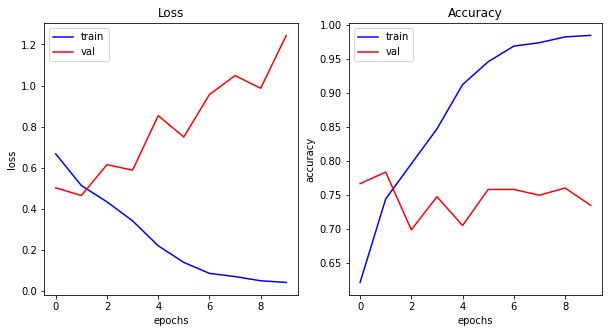

In [17]:
detect_.plot_history()

# 성차별/혐오 댓글 탐지 with Bert-base-multilingual

In [18]:
detect_gender = Detect_hate_comments(target=target[1], 
                                     model_name=model_name[0], 
                                     dir_path=dir_path[0])
detect_gender.train_model(epochs=10, batch_size=128)

100%|███████████████████████████████████████| 974/974 [00:00<00:00, 6447.39it/s]
Some layers from the model checkpoint at bert-base-multilingual-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/10


2022-04-08 19:36:07.084652: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


62/62 [==============================] - ETA: 0s - loss: 0.4030 - accuracy: 0.8475

2022-04-08 19:37:40.680391: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_accuracy improved from -inf to 0.91507, saving model to contain_gender_bias/bert-base-multilingual-cased/cp.ckpt
62/62 [==============================] - 113s 1s/step - loss: 0.4030 - accuracy: 0.8475 - val_loss: 0.2939 - val_accuracy: 0.9151
Epoch 2/10
62/62 [==============================] - ETA: 0s - loss: 0.3119 - accuracy: 0.8922
Epoch 2: val_accuracy did not improve from 0.91507
62/62 [==============================] - 65s 1s/step - loss: 0.3119 - accuracy: 0.8922 - val_loss: 0.2668 - val_accuracy: 0.9130
Epoch 3/10
62/62 [==============================] - ETA: 0s - loss: 0.2679 - accuracy: 0.9054
Epoch 3: val_accuracy improved from 0.91507 to 0.92357, saving model to contain_gender_bias/bert-base-multilingual-cased/cp.ckpt
62/62 [==============================] - 69s 1s/step - loss: 0.2679 - accuracy: 0.9054 - val_loss: 0.2467 - val_accuracy: 0.9236
Epoch 4/10
62/62 [==============================] - ETA: 0s - loss: 0.2318 - accuracy: 0.9170
Epoch 4: val_accuracy d

In [19]:
acc, f1, cls_report = detect_gender.evaluation(batch_size=128)
print(acc, f1)
print(cls_report)

2022-04-08 19:47:42.049756: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


0.9235668789808917 0.6949152542372882
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       404
           1       0.80      0.61      0.69        67

    accuracy                           0.92       471
   macro avg       0.87      0.79      0.83       471
weighted avg       0.92      0.92      0.92       471



In [20]:
detect_gender.test_model(batch_size=128)

,comments,contain_gender_bias_prediction
0,ㅋㅋㅋㅋ 그래도 조아해주는 팬들 많아서 좋겠다 ㅠㅠ 니들은 온유가 안만져줌 ㅠㅠ,0
1,둘다 넘 좋다~행복하세요,0
2,근데 만원이하는 현금결제만 하라고 써놓은집 우리나라에 엄청 많은데,0
3,원곡생각하나도 안나고 러블리즈 신곡나온줄!!! 너무 예쁘게 잘봤어요,0
4,장현승 얘도 참 이젠 짠하다...,0
...,...,...
969,대박 게스트... 꼭 봐야징~ 컨셉이 바뀌니깐 재미지넹,0
970,성형으로 다 뜯어고쳐놓고 예쁜척. 성형 전 니 얼굴 다 알고있다. 순자처럼 된장냄새...,1
971,분위기는 비슷하다만 전혀다른 전개던데 무슨ㅋㅋㄱ 우리나라사람들은 분위기만 비슷하면 ...,0
972,입에 손가릭이 10개 있으니 징그럽다,0


In [34]:
sentence2 = "응. 한남충 여기 하나 추가요"
print(detect_gender.predict(sentence2))

[0]


In [35]:
sentence2_ = "진짜 여가부 폐지할까요?"
print(detect_gender.predict(sentence2_))

[0]


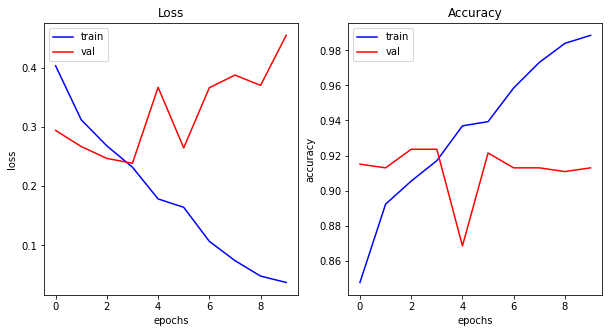

In [21]:
detect_gender.plot_history()

# 성차별/혐오 댓글 탐지 with kyKim/Bert-kor

In [3]:
detect_gender_ = Detect_hate_comments(target=target[1], 
                                      model_name=model_name[1], 
                                      dir_path=dir_path[1])
detect_gender_.train_model(epochs=10, batch_size=128)

100%|███████████████████████████████████████| 974/974 [00:00<00:00, 6884.75it/s]
2022-04-08 18:59:02.798111: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-08 18:59:02.798227: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Max


All model checkpoint layers were used when initializing TFBertModel.

All the layers of TFBertModel were initialized from the model checkpoint at kykim/bert-kor-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/10


2022-04-08 18:59:05.784848: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-08 18:59:12.386009: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


62/62 [==============================] - ETA: 0s - loss: 0.4209 - accuracy: 0.8468

2022-04-08 19:00:09.669451: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_accuracy improved from -inf to 0.91720, saving model to contain_gender_bias/kykim/bert-kor-base/cp.ckpt
62/62 [==============================] - 71s 964ms/step - loss: 0.4209 - accuracy: 0.8468 - val_loss: 0.2624 - val_accuracy: 0.9172
Epoch 2/10
62/62 [==============================] - ETA: 0s - loss: 0.2865 - accuracy: 0.8961
Epoch 2: val_accuracy did not improve from 0.91720
62/62 [==============================] - 54s 852ms/step - loss: 0.2865 - accuracy: 0.8961 - val_loss: 0.2408 - val_accuracy: 0.9151
Epoch 3/10
62/62 [==============================] - ETA: 0s - loss: 0.2335 - accuracy: 0.9139
Epoch 3: val_accuracy improved from 0.91720 to 0.93843, saving model to contain_gender_bias/kykim/bert-kor-base/cp.ckpt
62/62 [==============================] - 56s 905ms/step - loss: 0.2335 - accuracy: 0.9139 - val_loss: 0.2164 - val_accuracy: 0.9384
Epoch 4/10
62/62 [==============================] - ETA: 0s - loss: 0.1685 - accuracy: 0.9383
Epoch 4: val_accuracy did not imp

In [9]:
acc, f1, cls_report = detect_gender_.evaluation(batch_size=128)
print(acc, f1)
print(cls_report)

0.9384288747346072 0.7521367521367521
              precision    recall  f1-score   support

           0       0.95      0.99      0.96       404
           1       0.88      0.66      0.75        67

    accuracy                           0.94       471
   macro avg       0.91      0.82      0.86       471
weighted avg       0.94      0.94      0.93       471



In [5]:
detect_gender_.test_model(batch_size=128)

,comments,contain_gender_bias_prediction
0,ㅋㅋㅋㅋ 그래도 조아해주는 팬들 많아서 좋겠다 ㅠㅠ 니들은 온유가 안만져줌 ㅠㅠ,0
1,둘다 넘 좋다~행복하세요,0
2,근데 만원이하는 현금결제만 하라고 써놓은집 우리나라에 엄청 많은데,0
3,원곡생각하나도 안나고 러블리즈 신곡나온줄!!! 너무 예쁘게 잘봤어요,0
4,장현승 얘도 참 이젠 짠하다...,0
...,...,...
969,대박 게스트... 꼭 봐야징~ 컨셉이 바뀌니깐 재미지넹,0
970,성형으로 다 뜯어고쳐놓고 예쁜척. 성형 전 니 얼굴 다 알고있다. 순자처럼 된장냄새...,1
971,분위기는 비슷하다만 전혀다른 전개던데 무슨ㅋㅋㄱ 우리나라사람들은 분위기만 비슷하면 ...,0
972,입에 손가릭이 10개 있으니 징그럽다,0


In [36]:
print(detect_gender_.predict(sentence2))

[1]


In [37]:
print(detect_gender_.predict(sentence2_))

[0]


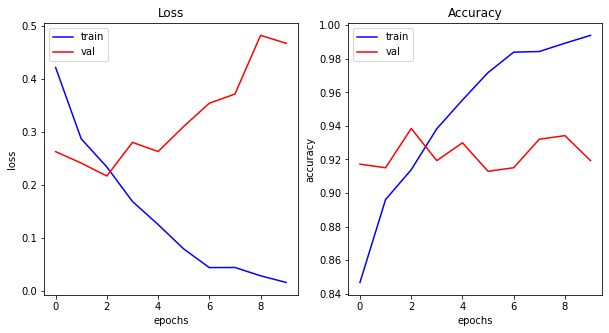

In [6]:
detect_gender_.plot_history()